# E-commerce Customer Churn Modeling
---

## 1. Introduction

**Background**

Customer churn is when customers that stopped using your company's product or service. Churn rate can be calculated by dividing the number of customers you lost during that time period -- say a quarter -- by the number of customers you had at the beginning of that time period. [(*source*)](https://blog.hubspot.com/service/what-is-customer-churn)

BukaOnline is an e-commerce platform that offers a wide range of products to its customers. The company is concerned about losing customers, and they want to build a predictive model to identify customers who are likely to churn. This will allow BukaOnline to take proactive measures to retain these customers, such as targeted marketing campaigns or special offers.

**Problem Statement**

Creating a predictive machine learning model to identify potential churn customers so that BukaOnline can prevent churn by implementing effective marketing measures. It's crucial to avoid misidentification of customers who are likely to churn but are incorrectly identified as non-churn customers, as they should receive the marketing campaign.

**Problem Statement Exploration**
- How many churn customer?
- What is their characteristics?
- Does spending time on BukaOnline will decrease the churn possibilty?
- etc.

**Objectives**
- Capable of comprehending the entirety of the Machine Learning concept.
- Proficient in data preparation for utilization in Classification Supervised Learning models.
- Skilled in implementing Classification Supervised Learning using chosen datasets.
- Competent in conducting Hyperparameter Tuning and enhancing models.
- Proficient in the deployment of models.

**Dataset**
- Title : ecommerce.csv
- Source: [Click Here!](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction?resource=download&select=E+Commerce+Dataset.xlsx)

| Column | Description |
| --- | --- |
|  CustomerID | Unique customer ID  |
|  Churn | Churn Flag (1 = Churn, 0 = Not Churn) |
| Tenure | length of time or duration for which a customer has been a part of or engaged with the e-commerce platform or organization |
| PreferredLoginDevice | Preferred login device of customer |
| CityTier | City tier |
| WarehouseToHome | Distance in between warehouse to home of customer |
| PreferredPaymentMode | Preferred payment method of customer |
| Gender | Gender of customer |
| HourSpendOnApp | Number of hours spend on mobile application or website |
| NumberOfDeviceRegistered | Total number of deceives is registered on particular customer |
| PreferedOrderCat | Preferred order category of customer in last month |
| SatisfactionScore | Satisfactory score of customer on service |
| MaritalStatus | Marital status of customer |
| NumberOfAddress | Total number of added added on particular customer |
| Complain | Any complaint has been raised in last month |
| OrderAmountHikeFromlastYear | Percentage increases in order from last year |
| CouponUsed | Total number of coupon has been used in last month |
| OrderCount | Total number of orders has been places in last month |
| DaySinceLastOrder | Day Since last order by customer |
| CashbackAmount | Average cashback in last month |

## 2. Import Libraries

Import several libraries or modules that needed into the notebook

In [1]:
# Library for dataframe and manipulation
import numpy as np
import pandas as pd

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries related to feature engineering
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency, kendalltau
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Model
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation and Parameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,  StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import randint

# Intrepretable
import shap

# model saving
import pickle

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Setting Random seed, so any code output will still remain in other running time
np.random.seed(9090)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## 3. Data Loading

In [2]:
# Load the csv file
data_raw = pd.read_csv('ecommerce.csv', sep=';')

In [3]:
# Show the first 10 data
print('The first 10 rows data')
display(data_raw.head(10))

# Show the last 10 data
print('The last 10 rows data')
display(data_raw.tail(10))

The first 10 rows data


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


The last 10 rows data


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5620,55621,0,3.0,Mobile Phone,1,35.0,Credit Card,Female,4.0,5,Mobile Phone,5,Single,3,0,15.0,1.0,2.0,5.0,163
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,234
5622,55623,0,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,NaN,7.0,245
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


The data successfully loaded into the notebook, next check the dataset info to understand the data

In [4]:
# Check the data info
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

- Dataset has 5630 rows with 20 columns
- Consists of 7 columns of floats, 8 columns of integers and 5 columns of objects
- There are indication that the dataset has missing value. Thus, we need to handle it later in feature engineering

## 4. Exploratory Data Analysis (EDA)

Before we continue we will copy the original dataset in order to keep the real data in case there is something unwanted during the data manipulation process

In [3]:
# copy dataframe for visualization, in order to keep the original data
data_viz = data_raw.copy()

### How Many That Churn?

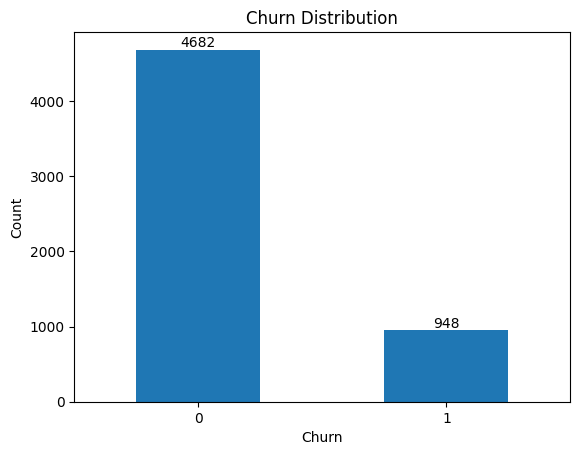

In [6]:
# Check the churn
data_viz['Churn'].value_counts().plot(kind='bar', rot=0)

# Adding annotations to the bars in Subplot 3
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
    xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')

# Show the plot
plt.show()

- The data shows there are 948 e-commerce customer that churn or about 16.83%

---
### Churn and Non-Churn Customer Characteristic

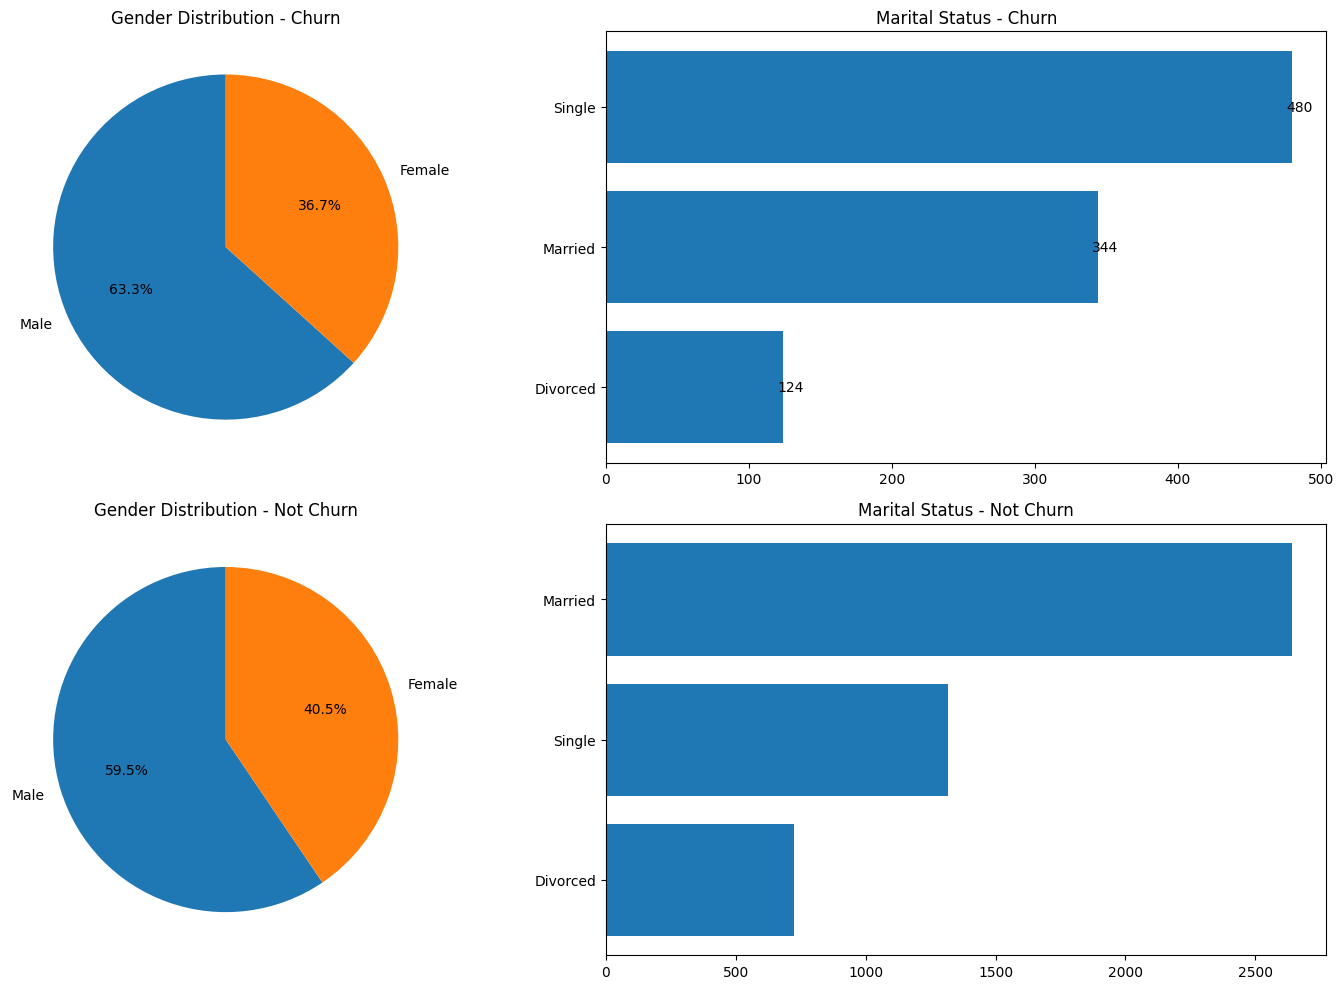

In [5]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Churned customers
churn_cust = data_viz[data_viz['Churn'] == 1]

# Gender distribution - Churn
churn_gender_counts = churn_cust['Gender'].value_counts()
axes[0, 0].pie(churn_gender_counts, labels=churn_gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Gender Distribution - Churn')

# Marital status - Churn
churn_marital_counts = churn_cust['MaritalStatus'].value_counts().sort_values()
axes[0, 1].barh(churn_marital_counts.index, churn_marital_counts.values)
axes[0, 1].set_title('Marital Status - Churn')

# Adding annotations to the bars in Subplot 3
for p in axes[0, 1].patches:
    axes[0, 1].annotate(str(int(p.get_width())), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center',
                       xytext=(5, 0), textcoords='offset points')

# Non-churned customers
not_churn = data_viz[data_viz['Churn'] == 0]

# Gender distribution - Not Churn
not_churn_gender_counts = not_churn['Gender'].value_counts()
axes[1, 0].pie(not_churn_gender_counts, labels=not_churn_gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Gender Distribution - Not Churn')

# Marital status - Not Churn
not_churn_marital_counts = not_churn['MaritalStatus'].value_counts().sort_values()
axes[1, 1].barh(not_churn_marital_counts.index, not_churn_marital_counts.values)
axes[1, 1].set_title('Marital Status - Not Churn')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


**Churn Customer**
- Most of the churn customers are male
- Where the majority of them is single
**Non-Churn Customer**
- Still dominated by Male
- But most of them are married

---
### How long they spend time on our app?

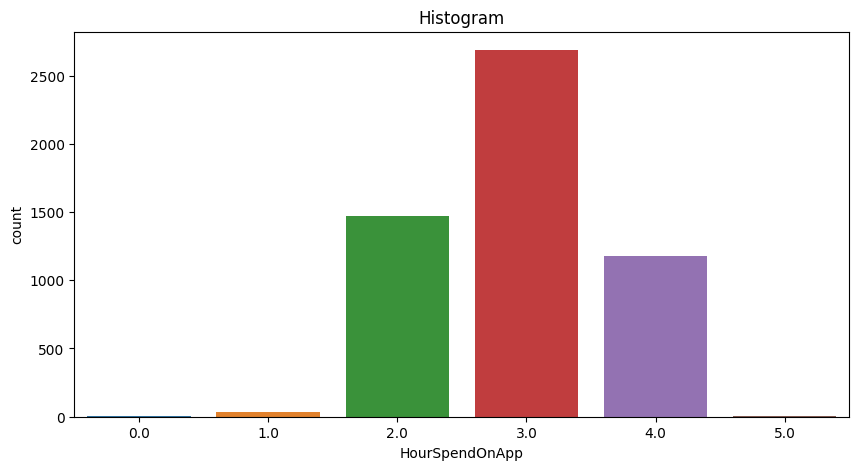

Mean : 2.9315348837209303
Median : 3.0


In [7]:
# Define figure size
plt.figure(figsize=(10, 5))

# the distribution of observations
sns.countplot(data=data_raw, x=data_raw['HourSpendOnApp'])
plt.title('Histogram')

# show the plot
plt.show()

print(f"Mean : {data_raw['HourSpendOnApp'].mean()}")
print(f"Median : {data_raw['HourSpendOnApp'].median()}")

**Churn Customers**
- Most of them spend their time on app 3 hours
- with mean score around 2.9 hours

---
### Where they live?

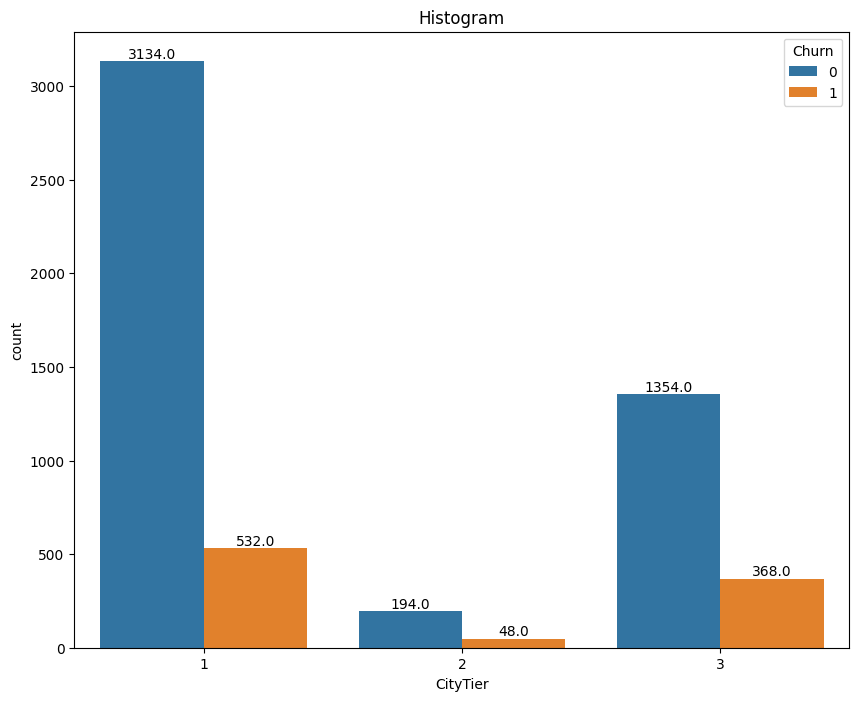

In [8]:
# Define figure size
plt.figure(figsize=(10, 8))

# Create the countplot
ax = sns.countplot(data=data_viz, x=data_viz['CityTier'], hue='Churn')
plt.title('Histogram')

# Adding annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Show the plot
plt.show()


- If we looked from the bar chart above, most of them is stay in City tier 1 and tier 3
- No differences in city tier rank if we group the data based on who are churn and not churn. The first position still at city tier 1 and followed by city tier 3

---
### Device and The Payment Method - Churn Customer

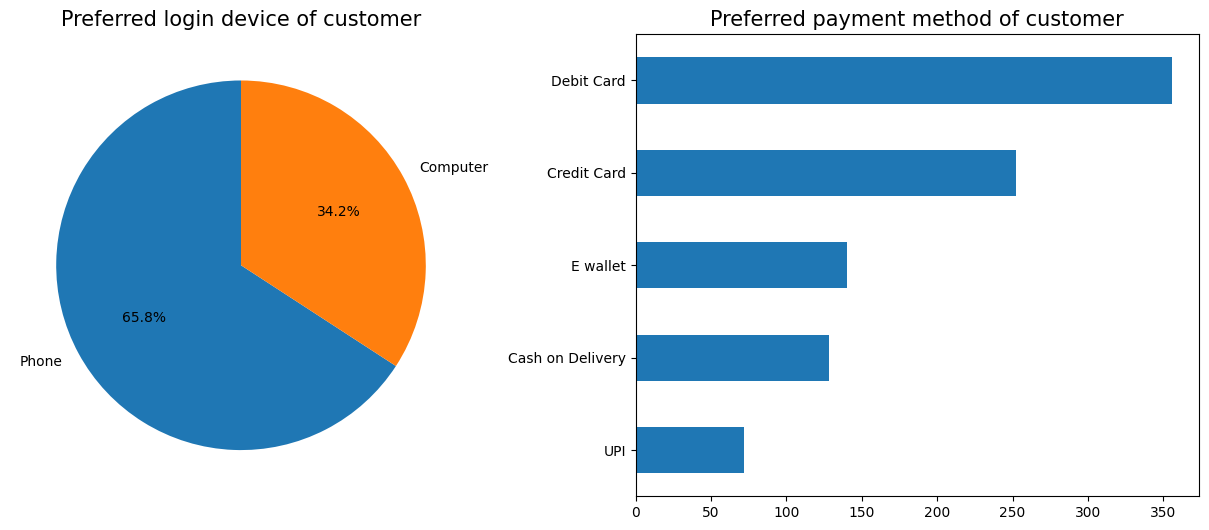

In [10]:
# Combine Values
churn_cust['PreferredPaymentMode'] = churn_cust['PreferredPaymentMode'].str.replace('CC', 'Credit Card', n=1).str.replace('COD', 'Cash on Delivery', n=1).astype('str')
churn_cust['PreferredLoginDevice'] = churn_cust['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')

# Create canvas
plt.figure(figsize=(16,6))

# Subplot contains pie chart
plt.subplot(1,2,1)
plt.pie(churn_cust['PreferredLoginDevice'].value_counts(), labels = churn_cust['PreferredLoginDevice'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title("Preferred login device of customer", fontsize=15)

# subplot contains horizontal barchart
plt.subplot(1,2,2)
churn_cust['PreferredPaymentMode'].value_counts().sort_values().plot(kind='barh')
plt.title("Preferred payment method of customer", fontsize=15)
plt.show()

**Churn Customers:**
- They prefer to access via phone compared to their computer.
- Payment method is dominated by Debit Card, followed by Credit Card.

## 5. Feature Engineering

Before we go any further lets copy the data that we will preprocessing and process later into the building model process. This will help to avoid any unwanted event to the original data set

In [11]:
# copy the original data set
df = data_raw.copy()

---
### Duplicate Data

In [12]:
# Check for duplicates data
df.duplicated().sum()

0

There is no duplicate data

---
### Cardinality Checking

In [13]:
# set colwidth hidher
pd.set_option('display.max_colwidth', None)

# Create a looping for unique values details
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

# Create into a dataframe
unique_val_df = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

# Show the dataframe
unique_val_df

,Column Name,Number of Unique,Unique Sample
0,CustomerID,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 50007, 50008, 50009, 50010, 50011, 50012, 50013, 50014, 50015, 50016, 50017, 50018, 50019, 50020, 50021, 50022, 50023, 50024, 50025, 50026, 50027, 50028, 50029, 50030, 50031, 50032, 50033, 50034, 50035, 50036, 50037, 50038, 50039, 50040, 50041, 50042, 50043, 50044, 50045, 50046, 50047, 50048, 50049, 50050, 50051, 50052, 50053, 50054, 50055, 50056, 50057, 50058, 50059, 50060, 50061, 50062, 50063, 50064, 50065, 50066, 50067, 50068, 50069, 50070, 50071, 50072, 50073, 50074, 50075, 50076, 50077, 50078, 50079, 50080, 50081, 50082, 50083, 50084, 50085, 50086, 50087, 50088, 50089, 50090, 50091, 50092, 50093, 50094, 50095, 50096, 50097, 50098, 50099, 50100, ...]"
1,Churn,2,"[1, 0]"
2,Tenure,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 14.0, 8.0, 18.0, 5.0, 2.0, 30.0, 1.0, 23.0, 3.0, 29.0, 6.0, 26.0, 28.0, 7.0, 24.0, 25.0, 10.0, 15.0, 22.0, 27.0, 16.0, 12.0, 21.0, 17.0, 50.0, 60.0, 31.0, 51.0, 61.0]"
3,PreferredLoginDevice,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,3,"[3, 1, 2]"
5,WarehouseToHome,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, 31.0, 18.0, 13.0, 20.0, 29.0, 28.0, 26.0, 14.0, nan, 10.0, 27.0, 17.0, 23.0, 33.0, 19.0, 35.0, 24.0, 16.0, 25.0, 32.0, 34.0, 5.0, 21.0, 126.0, 7.0, 36.0, 127.0]"
6,PreferredPaymentMode,7,"[Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card]"
7,Gender,2,"[Female, Male]"
8,HourSpendOnApp,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,6,"[3, 4, 5, 2, 1, 6]"


- The data actually has low cardinality
- However, some of the categorical does not have standardize values that why some of its redundant, such as :
    - `PreferredLoginDevice` : Mobile Phone equal Phone
    - `PreferredPaymentMode` : CC equal with Credit Card
    - `PreferedOrderCat` : Mobile Phone equal to Mobile

In [14]:
# Replace the corresponding values to avoid redundant
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].str.replace('Mobile Phone', 'Phone')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('CC', 'Credit Card')
df['PreferedOrderCat'] = df['PreferedOrderCat'].str.replace('Mobile Phone', 'Mobile')

Done! We've handled the cardinality. Now, let's get going.

---
### Data Splitting

This section will separated the data into train, test and inference data.

In [15]:
# Create separated data for data inference
data_inf = df.sample(1, random_state=99)

# Delete the inference data in the main data
df.drop(data_inf.index, inplace=True)

# Reset the index of the main data and inference data
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Delete the target from the inference data
data_inf.drop(['Churn'], axis=1, inplace=True)

In [16]:
# Define the X and y
X = df.drop(columns=['CustomerID','Churn'], axis=1)
y = df['Churn']

# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify=y,
                                                    random_state=1997)

In [17]:
# Check the size
print(f'Train set : {X_train.shape}')
print(f'test set : {X_test.shape}')

Train set : (4503, 18)
test set : (1126, 18)


The splitting process is done, now proceed to the next step

---
### Missing Value

In [18]:
# Check missing value
X_train.isna().sum()

Tenure                         203
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                200
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 207
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    212
CouponUsed                     203
OrderCount                     208
DaySinceLastOrder              252
CashbackAmount                   0
dtype: int64

the data does have any missing value, in `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromLastYear`, `CouponUsed`, `OrderCount` and `DaySinceLastOrder` column.

In [19]:
# Create train set with target to analyze deep for missing values
train_set = X_train.copy()
train_set['Churn'] = y_train

In [20]:
# Check the missing value patterns
na_df = train_set[train_set.isnull().any(axis=1)]
na_df.head(20)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
1318,15.0,Phone,1,8.0,Debit Card,Male,2.0,3,Others,3,Married,6,0,11.0,NaN,4.0,14.0,289,0
4950,1.0,Phone,3,11.0,Cash on Delivery,Male,3.0,4,Fashion,5,Single,2,1,23.0,3.0,5.0,NaN,221,1
5602,16.0,Phone,1,9.0,Debit Card,Male,3.0,4,Others,3,Married,7,0,NaN,1.0,5.0,15.0,314,0
1099,NaN,Phone,1,23.0,Credit Card,Male,3.0,5,Mobile,3,Married,2,0,15.0,0.0,1.0,2.0,123,0
3716,6.0,Phone,3,14.0,E wallet,Male,4.0,4,Laptop & Accessory,2,Divorced,6,0,13.0,2.0,2.0,NaN,217,0
2397,NaN,Computer,1,13.0,Cash on Delivery,Male,3.0,3,Mobile,3,Married,2,0,13.0,0.0,1.0,0.0,113,0
2275,24.0,Computer,1,12.0,Credit Card,Female,NaN,4,Mobile,3,Single,1,0,14.0,3.0,7.0,7.0,128,0
2081,21.0,Phone,1,10.0,Debit Card,Male,3.0,4,Fashion,3,Single,8,0,14.0,1.0,4.0,NaN,210,0
2108,NaN,Phone,3,16.0,Debit Card,Female,2.0,3,Mobile,3,Married,2,1,19.0,0.0,1.0,0.0,122,0
1907,0.0,Phone,1,6.0,UPI,Male,NaN,3,Mobile,1,Single,2,1,13.0,6.0,7.0,8.0,127,1


From the table observation, its hard to tell if there is any patterns on each missing value. We can make a reasonable assumption that the missingness is consistent with Missing Completely at Random (MCAR).

Here's a table summarizing the types of missing data and suitable imputation methods [(source)](https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values)

| Type of Missing Data          | Suitable Imputation Methods   |
|-------------------------------|-------------------------------|
| Missing Completely At Random  | Mean, Median, Mode, or any other imputation method  |
| Missing At Random            | Multiple Imputation, Regression Imputation  |
| Missing Not At Random        | Pattern Substitution, Maximum Likelihood Estimation  |

We will analyze further to determine whether we should use the mean or median as the imputation method.

In [21]:
# Create a function to visualize
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # the distribution of observations
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=df[variable])
    ax1.set_title('Histogram')

    # Boxplot
    ax2 = plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    ax2.set_title('Boxplot')

    # The main title
    plt.suptitle(f'Diagnostic Plots for {variable}', fontsize=16)

    # show the plot
    plt.show()

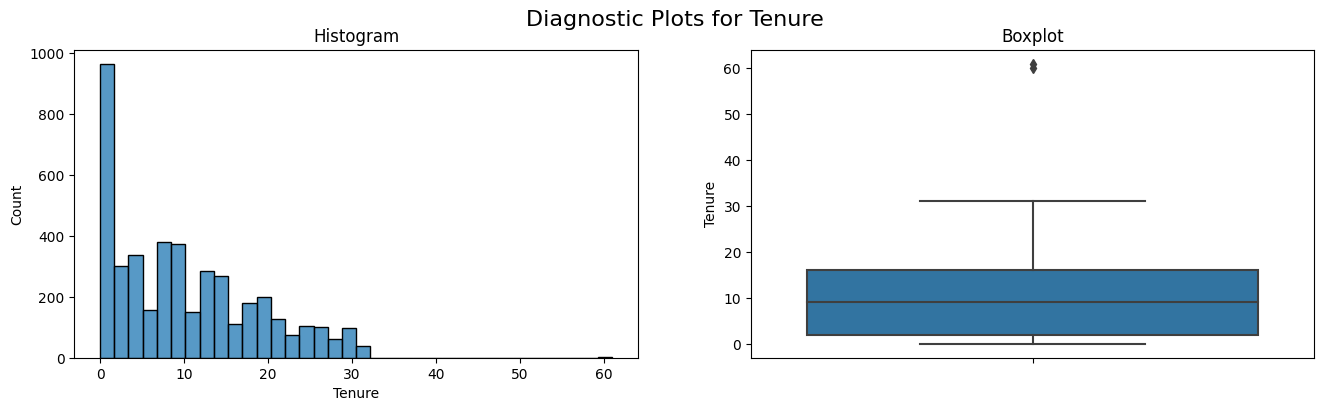

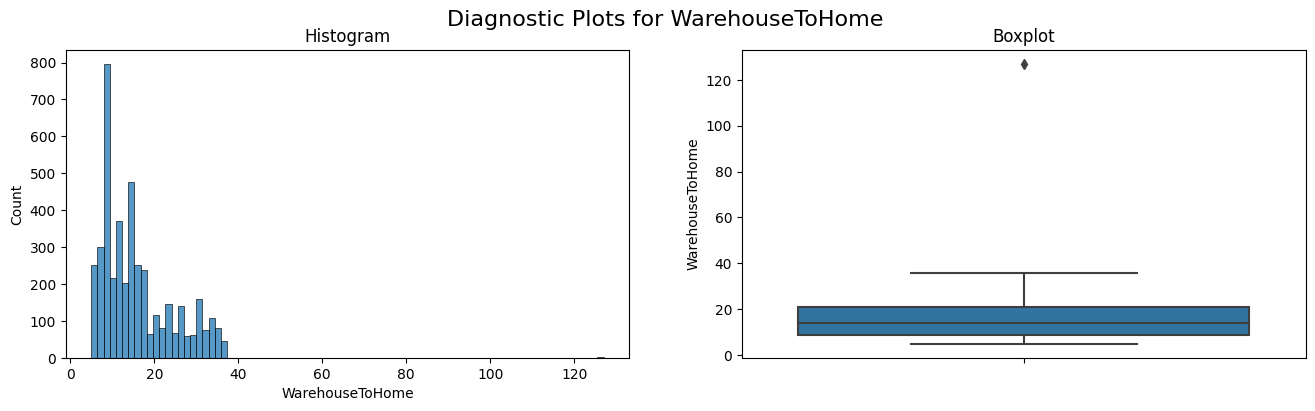

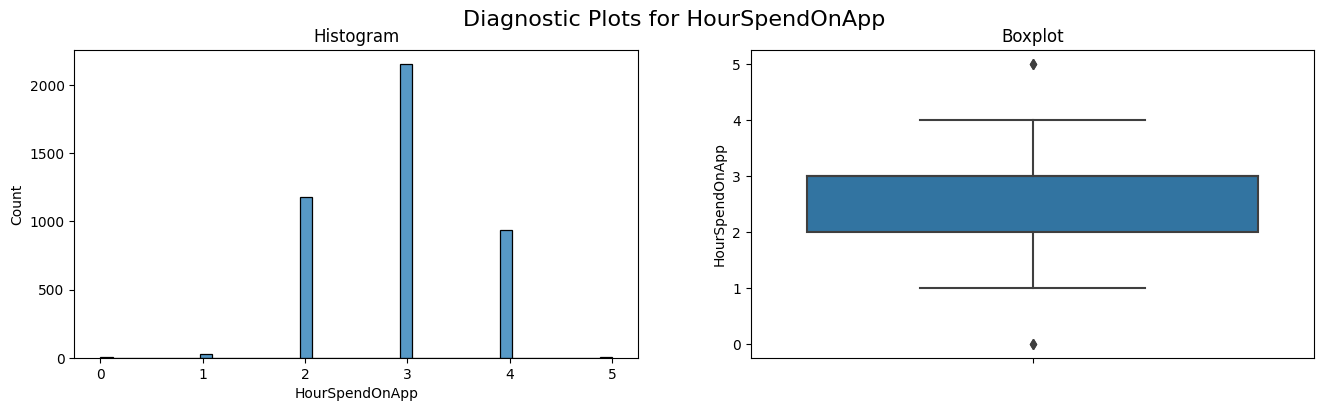

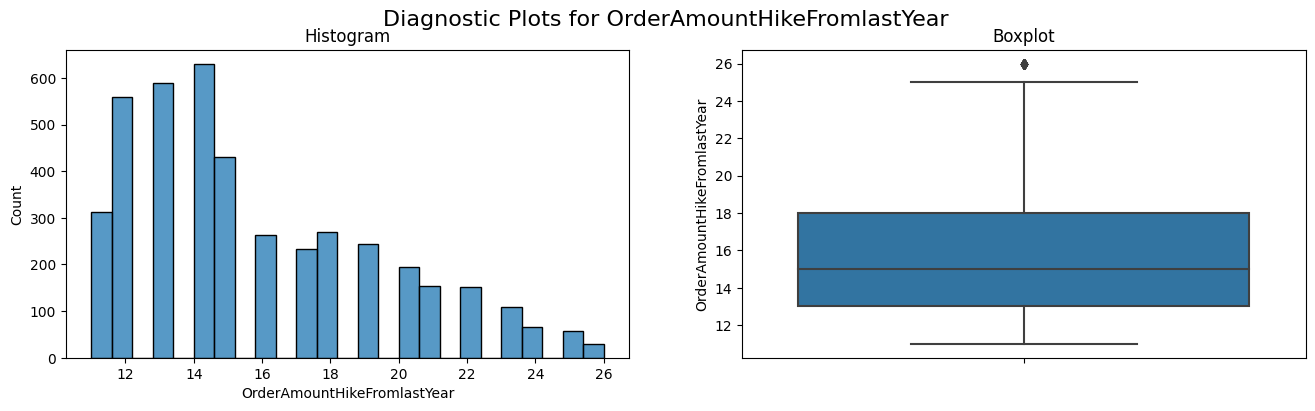

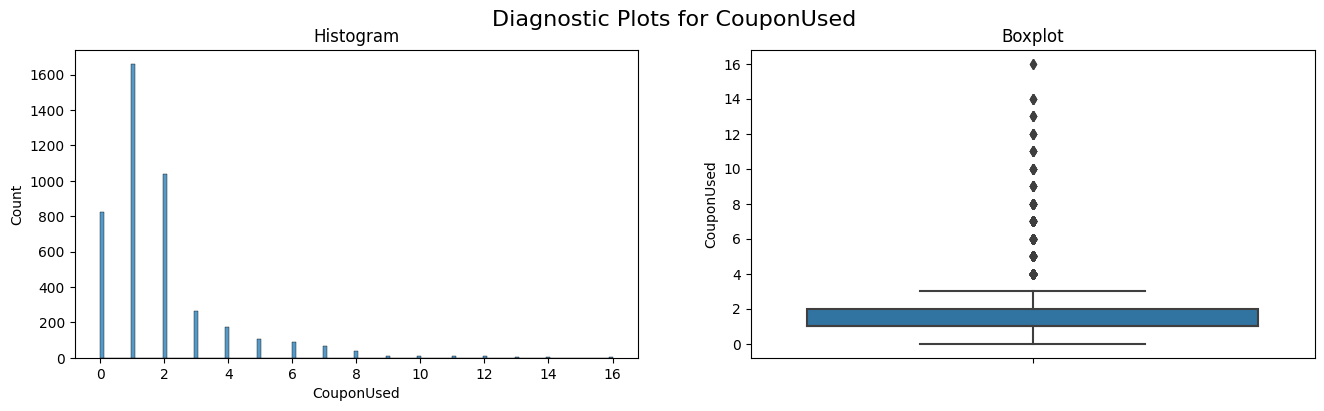

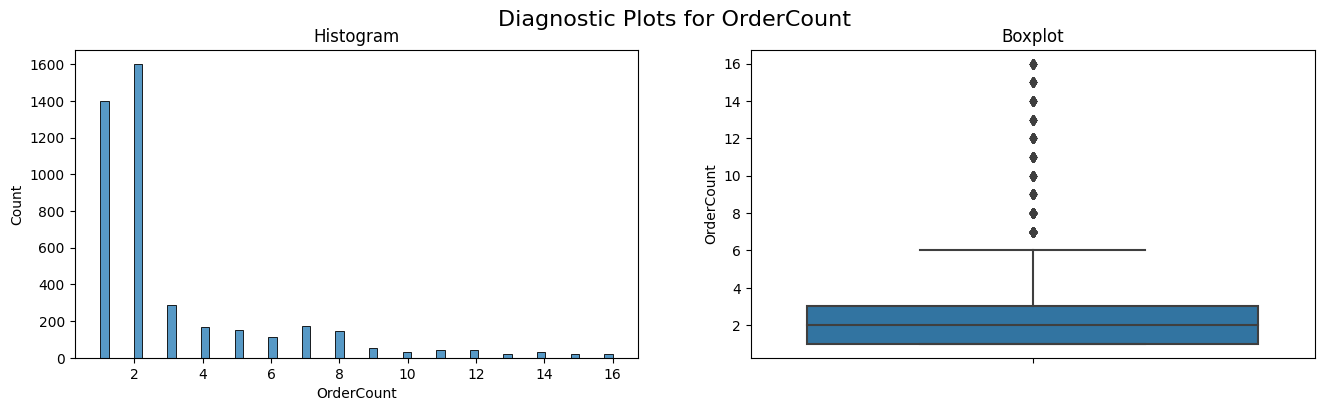

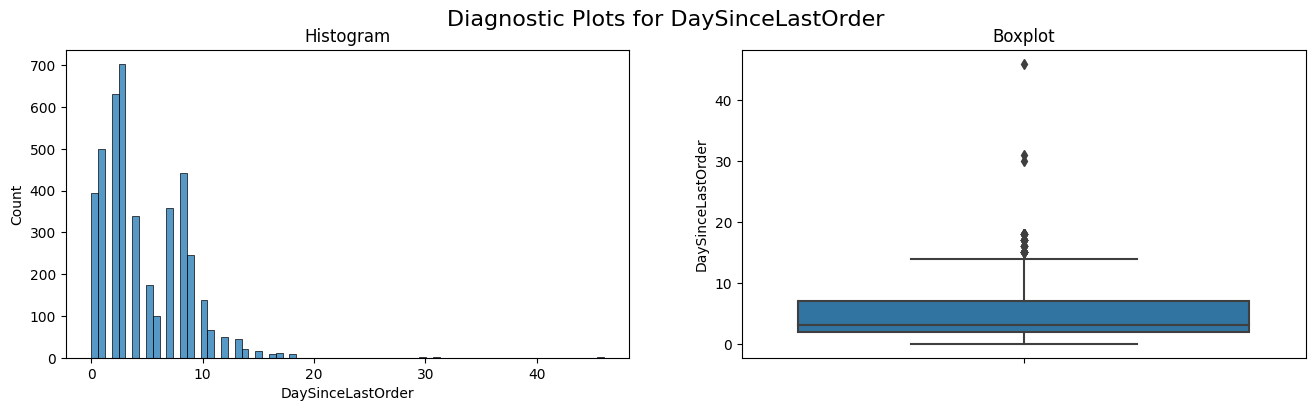

,Column,mean,median,std
0,Tenure,10.102558,9.0,8.539221
1,WarehouseToHome,15.694632,14.0,8.504829
2,HourSpendOnApp,2.930866,3.0,0.718371
3,OrderAmountHikeFromlastYear,15.718247,15.0,3.665385
4,CouponUsed,1.766279,1.0,1.893544
5,OrderCount,3.029802,2.0,2.939072
6,DaySinceLastOrder,4.550223,3.0,3.656936


In [22]:
# Columns has missing values
has_na = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
    'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
    'DaySinceLastOrder']

# Create an empty list to keep the central tendency and variation value
result = []

# For loop in each numerical columns
for col in X_train[has_na].columns:
    
    # Call the function 
    diagnostic_plots(X_train, col)
    
    # calculate the central tendency and standard deviation
    mean, std, median = X_train[col].mean(), X_train[col].std(), X_train[col].median()
    
    # Add to the list
    result.append([col, mean, median, std])

# Create a dataframe and show the result
ct_analysis = pd.DataFrame(result, columns=['Column', 'mean', 'median', 'std'])
ct_analysis

In order to handle these missing values, we will fill it using *Median* since it is the safe way when the data is not normal like above 

*(the mean and median is different)*

In [23]:
# Define the columns with missing values
columns_with_missing = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder'
]

# Create a SimpleImputer instance with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the training data
X_train[columns_with_missing] = imputer.fit_transform(X_train[columns_with_missing])

# Transform the X_test missing value using X_train median
X_test[columns_with_missing] = imputer.transform(X_test[columns_with_missing])

The missing values already handled

---
### Handling Outliers

In [24]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the columns
    for col in data.columns:
        col_name.append(col)

        # calculate skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly skewed upper and lower boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderately skewed
        elif skew_val >= 0.5 or skew_val <= -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normally distributed
        else:
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result

In [25]:
'''
We will exlcude CityTier and Complain column. Eventhough the value is in numeric,
But the actual value is a nominal for complain column and ordinal for city tier
'''

# Select the data except categorical and target columns
outlier_check = X_train[['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]

# Check the data skewness and boundaries
outlier_analysis(outlier_check)

,columns,skewness,upper boundary,lower boundary,has_outliers
0,Tenure,0.778542,33.000000,-15.000000,True
1,WarehouseToHome,1.410167,53.000000,-24.000000,True
2,HourSpendOnApp,-0.023756,5.934044,-0.065956,False
3,NumberOfDeviceRegistered,-0.391126,6.699756,0.699756,False
4,SatisfactionScore,-0.146354,9.071286,-2.928714,False
5,NumberOfAddress,1.081196,18.000000,-10.000000,True
6,OrderAmountHikeFromlastYear,0.838672,25.500000,5.500000,True
7,CouponUsed,2.576681,5.000000,-2.000000,True
8,OrderCount,2.231388,9.000000,-5.000000,True
9,DaySinceLastOrder,1.331739,22.000000,-13.000000,True


- From the analysis above we got several columns that have outliers, the columns below :
    - `['Tenure', 'WarehouseToHome', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']`
- All the columns above is not normally distributed (skew > 0.5 or skew < -0.5), therefore we will use *iqr* to handle this outliers

*Notes* : remember to apply the transform to the test set if we use the capping method

In [26]:
# have outlier
have_outliers = ['Tenure', 'WarehouseToHome', 'NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount','DaySinceLastOrder']

# Capping the skewed distribution
winsoriser_fare = Winsorizer(
    capping_method='quantiles',
    tail='both',
    fold=3,
    variables=have_outliers
)

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

---
### Feature selection

In [27]:
# Define categorical columns
cat_cols = [
    'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender',
    'PreferedOrderCat', 'MaritalStatus', 'Complain']

# Define numerical columns
num_cols = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
    'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount']

In [28]:
'''
First, we will check the categorical columns first,
In this step we will use chi-squared
'''
# Set the significance level (alpha)
alpha = 0.05

# Perform chi-squared test for each categorical column
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'chi2-statistic', 'p-value', 'is_correlated'])

for cat_column in cat_cols:
    contingency_table = pd.crosstab(X_train[cat_column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # Use pd.concat to concatenate the DataFrames
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the chi-squared test results DataFrame for categorical columns
correlation_df_categorical

,categorical_column,chi2-statistic,p-value,is_correlated
0,PreferredLoginDevice,12.614212,3.828250e-04,Yes
1,CityTier,38.011913,5.569522e-09,Yes
2,PreferredPaymentMode,49.527929,1.730900e-09,Yes
3,Gender,3.704186,5.427615e-02,No
4,PreferedOrderCat,246.943457,2.964697e-52,Yes
5,MaritalStatus,151.719375,1.133852e-33,Yes
6,Complain,253.180335,5.261566e-57,Yes


- The result above show that only `Gender` category that does not have correlation with the target variable

In [29]:
# Initialize lists to store results
corr_coeffs = []
p_values = []
interpretations = []

# Loop through numerical columns and calculate Kendall's correlation
for col in num_cols:
    corr_coeff, p_value = kendalltau(X_train[col], y_train)
    corr_coeffs.append(corr_coeff)
    p_values.append(p_value)
    
    # Interpret the results
    if p_value < 0.05:
        if corr_coeff > 0:
            interpretation = "Positive correlation"
        elif corr_coeff < 0:
            interpretation = "Negative correlation"
        else:
            interpretation = "No correlation"
    else:
        interpretation = "Not statistically significant"
    
    interpretations.append(interpretation)

# Create a DataFrame to store the results
correlation_results = pd.DataFrame({
    'Numerical Column': num_cols,
    "Kendall's Correlation Coefficient": corr_coeffs,
    'P-Value': p_values,
    'Interpretation': interpretations
})

# Show the correlation results DataFrame
correlation_results


,Numerical Column,Kendall's Correlation Coefficient,P-Value,Interpretation
0,Tenure,-0.321055,3.906835e-146,Negative correlation
1,WarehouseToHome,0.072117,7.445540e-09,Positive correlation
2,HourSpendOnApp,0.019139,1.760865e-01,Not statistically significant
3,NumberOfDeviceRegistered,0.085698,4.552921e-10,Positive correlation
4,SatisfactionScore,0.103023,1.561686e-14,Positive correlation
5,NumberOfAddress,0.025813,4.700043e-02,Positive correlation
6,OrderAmountHikeFromlastYear,-0.000265,9.834099e-01,Not statistically significant
7,CouponUsed,-0.008913,5.100279e-01,Not statistically significant
8,OrderCount,-0.028669,3.407450e-02,Negative correlation
9,DaySinceLastOrder,-0.158429,3.936864e-35,Negative correlation


- In the numerical columns, there are `HourSpendOnApp`, `OrderAmountHikeFromlastYear` and `CouponUsed` that does not statistically significant

**Suggestion**

So there are 4 columns that we will not use during the modeling process and these columns will be dropped in the pipeline

---
### Handling Imbalance

As we found during the EDA process, we found that our data is imbalance. Therefore, we will do `SMOTE-NC` in the dataset to help the model perform better. We consider this method since we have categorical data in the dataset as well

In [30]:
cat_cols

['PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

In [31]:
# Define the categorical columns
cat_cols = [
    'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender',
    'PreferedOrderCat', 'MaritalStatus', 'Complain']

# Get the indeces for categorical columns
categorical_column_indices = [X_train.columns.get_loc(col) for col in cat_cols]

In [32]:
# Set resampling method, which is SMOTE-NC and the categorical indeces
smotenc = SMOTENC(categorical_column_indices, random_state = 42)

# # Apply the SMOTE
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train, y_train)

# # Check the target distribution
y_train_balanced.value_counts()

0    3745
1    3745
Name: Churn, dtype: int64

--- 
### Encoding and Scaling

The numerical data is not on the same scale, so we need a scaler to help the model perform better. In this process, we will use **Standard Scaler** as the scaling method and combine it later in the pipeline to avoid data leakage since it can be a good practice even after handling outliers. For the categorical we will try to use **One Hot Encoder** since our data is nominal type

In [33]:
# Define the Scaling method
scaler = StandardScaler()

# Define the Encoder
encoder = OneHotEncoder(handle_unknown='ignore')

we already define the scaler and encoder method, now we will prepare the column transformer. The aim is to put the transformer into the pipeline to make our modeling process is efficient

In [34]:
# Define categorical columns
cat_cols = [
    'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender',
    'PreferedOrderCat', 'MaritalStatus', 'Complain']

# Define the fix numerical columns
num_cols = ['Tenure', 'WarehouseToHome', 
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Pipeline scaler with imputer
scaler_imputer = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler)
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaled and imputed', scaler_imputer, num_cols),  # Scale specific columns
        ('encoded', encoder, cat_cols)  # Passthrough categorical columns
    ],
    remainder='drop'  # Drop all other columns
)

The preprocessor column transformer is done, now just get the features name after transformer in case we need it for analysis

In [35]:
# Create the ColumnTransformer
testing = preprocessor.fit(X_train_balanced)

# Create the ColumnTransformer
cols_after_ct = num_cols + (testing.transformers_[1][1].get_feature_names_out().tolist())

We will use this list columns later in case we need to show the data after column transformer in a dataframe form, since the data will be just an array.

## 6. Model Definition

Here are the models that will be used:

1. **Random Forest**:
   - Random Forest is an ensemble learning method that combines multiple decision trees to provide robust and accurate classification by reducing overfitting and capturing complex relationships in the data.

2. **Support Vector Machine (SVM)**:
   - SVM is a powerful algorithm that finds a hyperplane in the feature space to maximize the margin between different classes, making it effective in separating non-linearly separable data.

3. **K-Nearest Neighbors (KNN)**:
   - KNN is a simple yet effective classification algorithm that classifies data points based on the majority class among their k-nearest neighbors in the feature space.

4. **Decision Tree**:
   - Decision Tree is a tree-like model that recursively splits the dataset based on feature values to make binary decisions, making it interpretable and capable of capturing complex decision boundaries.

5. **XGBoost**:
   - XGBoost is a gradient boosting algorithm that combines the predictions of multiple weak learners (usually decision trees) in an additive manner, optimizing a loss function, and is known for its high predictive accuracy and efficiency.

In [36]:
# Define the Random Forest Classifier with a random state
random_forest_model = RandomForestClassifier(random_state=42)

# Define the Support Vector Machine (SVM) Classifier with a random state
svm_model = SVC(random_state=42)

# Define the K-Nearest Neighbors (KNN) Classifier with a random state
knn_model = KNeighborsClassifier()

# Define the Decision Tree Classifier with a random state
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Define the XGBoost Classifier with a random state
xgboost_model = xgb.XGBClassifier(random_state=42)

**Metrics**

As stated in the problem statement, the primary objective of this project is to minimize the number of cases where the model fails to identify customers who are likely to churn in the context of BukaOnline's e-commerce platform. This objective corresponds to the **Recall** value.

A higher Recall indicates that the model correctly identifies more customers who have actually churned, aligning with BukaOnline's goal of proactive churn prediction to reduce customer attrition and improve retention. It is essential to prioritize Recall while maintaining an acceptable level of precision to avoid excessive false negatives.

In addition to Recall, we will also consider other metrics such as **ROC-AUC** to assess the model's ability to differentiate between customers likely to churn and those likely to stay. Given the potential class imbalance in the dataset, ROC-AUC provides valuable insights into the model's overall discriminatory power.

The focus on Recall ensures that BukaOnline can effectively target and engage with customers at risk of churning, thereby maximizing the impact of their retention efforts and ultimately improving the platform's customer retention rates.

## 7. Model Training

The model Training will employ cross-validation in the grid search cross validation to determine which model performs optimally. Subsequently, we will select the best-performing model and conduct hyperparameter tuning to enhance its performance.

In [37]:
# Model list
models = {'model' : [random_forest_model, svm_model, knn_model,
                     decision_tree_model, xgboost_model]}

# Building pipeline
estimators = Pipeline([
    ('preprocess', preprocessor),
    ('model', models)])

# Initialize Stratified K-Fold cross-validator
skfold = StratifiedKFold(n_splits=5)

# Model Benchmarking using Grid Search
search = GridSearchCV(
    estimator=estimators,
    param_grid=models,
    scoring=['recall', 'roc_auc'],
    cv=skfold,
    return_train_score=True,
    refit=False 
)

In [38]:
# Model Bencmarking using Grid Search (Process)
search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('scaled '
                                                                         'and '
                                                                         'imputed',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAdd...
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...)]},
             refit=False, return_train_score=True,
             scoring=['recall', 'roc_auc'])

## 8. Model Evaluation




### Model Benchmarking

In [39]:
# Result
cv_result = pd.DataFrame(search.cv_results_)

# Create a table to keep the recall and roc-auc score
cv_result_recall = cv_result[['param_model', 'mean_test_recall', 'std_test_recall', 'mean_train_recall', 'std_train_recall', 'rank_test_recall']]
cv_result_rocauc = cv_result[['param_model', 'mean_test_roc_auc', 'mean_train_roc_auc', 'rank_test_roc_auc']]

In [40]:
# Show the Rank of recall score
cv_result_recall.sort_values(by='rank_test_recall')

,param_model,mean_test_recall,std_test_recall,mean_train_recall,std_train_recall,rank_test_recall
2,KNeighborsClassifier(),0.965821,0.034492,0.986315,0.002695,1
4,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=42, ...)",0.951135,0.074516,0.999733,0.000134,2
0,RandomForestClassifier(random_state=42),0.933778,0.083338,1.000000,0.000000,3
3,DecisionTreeClassifier(random_state=42),0.909479,0.079694,1.000000,0.000000,4
1,SVC(random_state=42),0.908411,0.068013,0.946595,0.007469,5


From the recall score of train and validation score we could see the best one is `KNeighborsClassifier` model and the second place is `XGBoost`.

In [41]:
cv_result_rocauc.sort_values(by='rank_test_roc_auc')

,param_model,mean_test_roc_auc,mean_train_roc_auc,rank_test_roc_auc
4,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=42, ...)",0.991584,0.999999,1
0,RandomForestClassifier(random_state=42),0.990874,1.000000,2
2,KNeighborsClassifier(),0.979694,0.996731,3
1,SVC(random_state=42),0.966908,0.980160,4
3,DecisionTreeClassifier(random_state=42),0.921095,1.000000,5


But if we see the ROC-AUC score of those model, the best one is `XGBoost` and the second position is `Random Forest`.

**Findings**
- The best model for minimizing the True Negative score based on cross-validation is the `KNeighborsClassifier`.
- However, when it comes to the model that can differentiate between the two classes effectively, the `XGBoost` model performs the best.

**Suggestions**

Since our focus is on the Recall score, we will choose the `KNeighborsClassifier` model as our main model for now 

***Notes :** (*there is still a possibility the model would change*)

---
### KNN - Hyperparameter Tuning

In [42]:
# Create the model pipeline
estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', knn_model)])

# Create the parameter grid (I already put the default parameter too)
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'model__weights': ['uniform', 'distance'],  # Weighting method for neighbors
    'model__p': [1, 2]  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

# Initialize Stratified K-Fold cross-validator
skfold = StratifiedKFold(n_splits=5)

# Conduct the Grid Search
grid_search = GridSearchCV(estimator, param_grid, cv=skfold, scoring='recall',  n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Collect the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [43]:
# print the result
print('Best Parameters :')
print(best_params)
print('------------------------------------')
print('Best Recall Score :')
print(best_score)

Best Parameters :
{'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'distance'}
------------------------------------
Best Recall Score :
0.97543391188251


- The hyperparameter tuning got the best parameter for KNN model in this model building are:
    - `{'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'distance'}`
- With recall score 97.35 %

Now lets evaluate the model in the test set

---
### KNN - Evaluate the model to Test set

In [44]:
# Save the best model we get from grid search
best_model = grid_search.best_estimator_

# Predict the test set target
y_test_pred = best_model.predict(X_test_capped)
test_report = classification_report(y_test, y_test_pred)

# Print the Classification Report
print('Classification Report Test Set : \n', test_report)

Classification Report Test Set : 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       936
           1       0.73      0.93      0.82       190

    accuracy                           0.93      1126
   macro avg       0.86      0.93      0.89      1126
weighted avg       0.94      0.93      0.93      1126



- The classification report of test set showed recall score is 93%
- This indicates the model is overfit

**Suggestion**

There is several ways to handle the overfitting of a model. Overfitting is usually cause because the data is too complex, lets see if we could get better result if we add feature selection and reduce the features

---
### KNN (with feature selection) - Hyperparameter Tuning and Evaluation

In [45]:
'''
The original data after encoding and scaling is 32 columns.
Now lets experiment by reduce it into 28 columns'''

# Define the number of features to select (adjust as needed)
num_features_to_select = 28 

# Create the model pipeline
estimator = Pipeline([
    ('preprocess', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=num_features_to_select)),
    ('model', knn_model)])

# Create the parameter grid (I already put the default parameter too)
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'model__weights': ['uniform', 'distance'],  # Weighting method for neighbors
    'model__p': [1, 2]  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

# Initialize Stratified K-Fold cross-validator
skfold = StratifiedKFold(n_splits=5)

# Conduct the Grid Search
grid_search = GridSearchCV(estimator, param_grid, cv=skfold, scoring='recall',  n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Collect the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print the result
print('Best Parameters :')
print(best_params)
print('------------------------------------')
print('Best Recall Score :')
print(best_score)

# Save the best model we get from grid search
best_model = grid_search.best_estimator_

# Predict the test set target
y_test_pred = best_model.predict(X_test_capped)
test_report = classification_report(y_test, y_test_pred)

# Print the Classification Report
print('\nClassification Report Test Set : \n', test_report)

Best Parameters :
{'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'distance'}
------------------------------------
Best Recall Score :
0.9650200267022697

Classification Report Test Set : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       936
           1       0.74      0.91      0.81       190

    accuracy                           0.93      1126
   macro avg       0.86      0.92      0.89      1126
weighted avg       0.94      0.93      0.93      1126



- The train recall score is 96 % and the test set is 91%
- The model still overfitting, and the test recall score is decreasing

**Suggestion**

The KNN model is overfitting, even if we using feature selection. It only make the test recall score more worse. Therefore, we will try to experiment with the best second model, **XGBoost**.

---
### XGBoost - Hyperparameter Tuning and Evaluation

In [46]:
'''
XGBoost is one of ensemble model, it may takes long time to run this
hyperparameter tuning. Therefore, we will use Random Search for this model
'''

# Create the model pipeline
estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', xgboost_model)])

# Define the parameter distribution for random search
param_dist = {
    'model__n_estimators': randint(100, 1000),          # Number of trees
    'model__learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'model__max_depth': randint(3, 15),               # Maximum depth of the tree
    'model__min_child_weight': randint(1, 10),        # Minimum sum of instance weight (hessian) needed in a child
    'model__subsample': [0.8, 0.9, 1.0],             # Fraction of samples used for fitting the trees
    'model__colsample_bytree': [0.8, 0.9, 1.0],      # Fraction of features used for fitting the trees
    'model__gamma': [0, 0.1, 0.2],                   # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'model__reg_alpha': [0, 0.1, 0.2],               # L1 regularization term on weights
    'model__reg_lambda': [0, 0.1, 0.2],              # L2 regularization term on weights
}

# Initialize Stratified K-Fold cross-validator
skfold = StratifiedKFold(n_splits=5)

# Conduct the Randomized Search
random_search = RandomizedSearchCV(estimator, param_distributions=param_dist, cv=skfold, scoring='recall', n_iter=10, n_jobs=-1, random_state=101)
random_search.fit(X_train_balanced, y_train_balanced)

# Collect the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# print the result
print('Best Parameters :')
print(best_params)
print('------------------------------------')
print('Best Recall Score :')
print(best_score)

# Save the best model we get from grid search
best_model = random_search.best_estimator_

# Predict the test set target
y_test_pred = best_model.predict(X_test_capped)
test_report = classification_report(y_test, y_test_pred, digits=5)

# Print the Classification Report
print('\nClassification Report Test Set : \n', test_report)


Best Parameters :
{'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 11, 'model__min_child_weight': 4, 'model__n_estimators': 563, 'model__reg_alpha': 0.1, 'model__reg_lambda': 0.1, 'model__subsample': 0.8}
------------------------------------
Best Recall Score :
0.9548731642189585

Classification Report Test Set : 
               precision    recall  f1-score   support

           0    0.98392   0.98077   0.98234       936
           1    0.90674   0.92105   0.91384       190

    accuracy                        0.97069      1126
   macro avg    0.94533   0.95091   0.94809      1126
weighted avg    0.97090   0.97069   0.97078      1126



- The train recall score is 95.48%, and the test recall score is 92.10%.
- The model is still slightly overfitting, although it's small and considered acceptable.

**Suggestion:**

However, we are still not satisfied with the result for now. Thus, we will use feature selection again in the XGBoost model to see if the overfitting can be fixed.

---
### XGBoost (with feature selection) - Hyperparameter Tuning and Evaluation

In [47]:
# Define the number of features to select (adjust as needed)
num_features_to_select = 18

# Create the model pipeline
estimator = Pipeline([
    ('preprocess', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=num_features_to_select)),
    ('model', xgboost_model)])

# Define the parameter distribution for random search
param_dist = {
    'model__n_estimators': randint(100, 1000),          # Number of trees
    'model__learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'model__max_depth': randint(3, 15),               # Maximum depth of the tree
    'model__min_child_weight': randint(1, 10),        # Minimum sum of instance weight (hessian) needed in a child
    'model__subsample': [0.8, 0.9, 1.0],             # Fraction of samples used for fitting the trees
    'model__colsample_bytree': [0.8, 0.9, 1.0],      # Fraction of features used for fitting the trees
    'model__gamma': [0, 0.1, 0.2],                   # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'model__reg_alpha': [0, 0.1, 0.2],               # L1 regularization term on weights
    'model__reg_lambda': [0, 0.1, 0.2],              # L2 regularization term on weights
}

# Initialize Stratified K-Fold cross-validator
skfold = StratifiedKFold(n_splits=5)

# Conduct the Randomized Search
random_search = RandomizedSearchCV(estimator, param_distributions=param_dist, cv=skfold, scoring='recall', n_iter=10, n_jobs=-1, random_state=101)
random_search.fit(X_train_balanced, y_train_balanced)

# Collect the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# print the result
print('Best Parameters :')
print(best_params)
print('------------------------------------')
print('Best Recall Score :')
print(best_score)

# Save the best model we get from grid search
best_model = random_search.best_estimator_

# Predict the test set target
y_test_pred = best_model.predict(X_test_capped)
test_report = classification_report(y_test, y_test_pred, digits=5)

# Print the Classification Report
print('\nClassification Report Test Set : \n', test_report)

Best Parameters :
{'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 11, 'model__min_child_weight': 4, 'model__n_estimators': 563, 'model__reg_alpha': 0.1, 'model__reg_lambda': 0.1, 'model__subsample': 0.8}
------------------------------------
Best Recall Score :
0.9361815754339118

Classification Report Test Set : 
               precision    recall  f1-score   support

           0    0.98592   0.97222   0.97902       936
           1    0.87192   0.93158   0.90076       190

    accuracy                        0.96536      1126
   macro avg    0.92892   0.95190   0.93989      1126
weighted avg    0.96668   0.96536   0.96582      1126



- The train recall score is 93.61%, and the test recall score is 93.15%.
- The model is considered *a good fit.*
- We still get a good fit even we only use 18 columns from 32 total columns (this is total after encoding and scaling)
- Here are the best parameters we obtained:
  - `{'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 11, 'model__min_child_weight': 4, 'model__n_estimators': 563, 'model__reg_alpha': 0.1, 'model__reg_lambda': 0.1, 'model__subsample': 0.8}`

Even though the train recall score decreased, we will consider using this model since the gap between the train and test scores is smaller. So, we could say this is the best model where it is a good fit and could perform better with only 18 columns

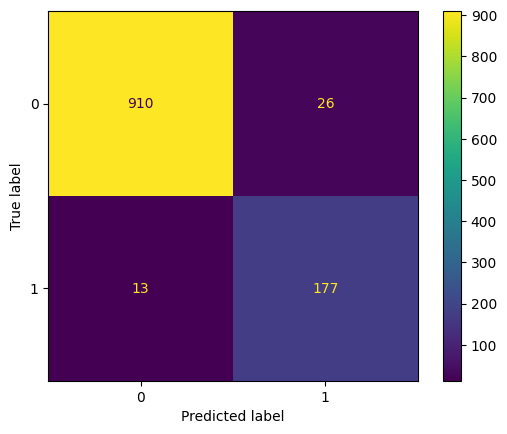

In [48]:
# Visualize the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()
plt.show()

- From the confusion matrix, we can see that the model was able to correctly predict 177 churn customers (*True Positives*).
- It only made a prediction error (*False Negatives*) for 13 churn customers.

### Features Important

In XGBoost, feature importances are a measure of the relative importance or contribution of each feature (input variable) in making predictions with the model. Feature importances help you understand which features have the most influence on the model's predictions and can be useful for feature selection, understanding the model's behavior, and identifying key factors that drive the model's decision-making.

In this section we will try to analyze it

In [49]:
# Get the selected feature indices
selected_feature_indices = best_model.named_steps['feature_selection'].get_support(indices=True)

# Collect the names of selected features
selected_feature_names = [cols_after_ct[i] for i in selected_feature_indices]

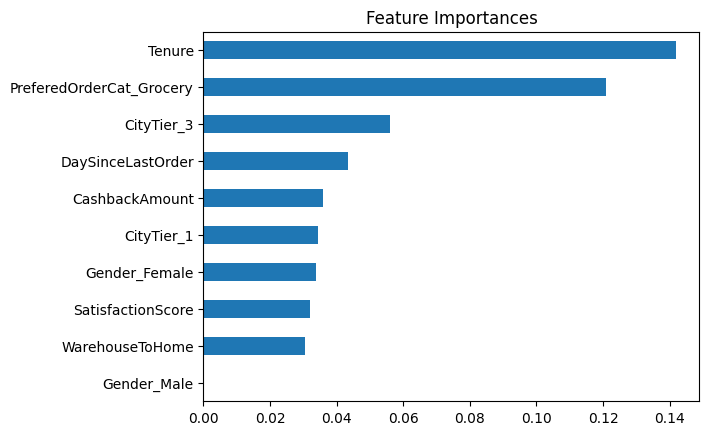

In [50]:
# Create a Pandas Series with feature importances and sort it
coef1 = pd.Series(best_model['model'].feature_importances_, selected_feature_names).head(10)
# Plot the feature importances
coef1.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()

The top 5 features that important to the model are
- `Tenure`
- `PreferredOrderCat_Grocery`
- `CityTier_3` 
- `DaySinceLastOrder` 
- `CashbcackAmount`

100%|===================| 7476/7490 [07:27<00:00]        

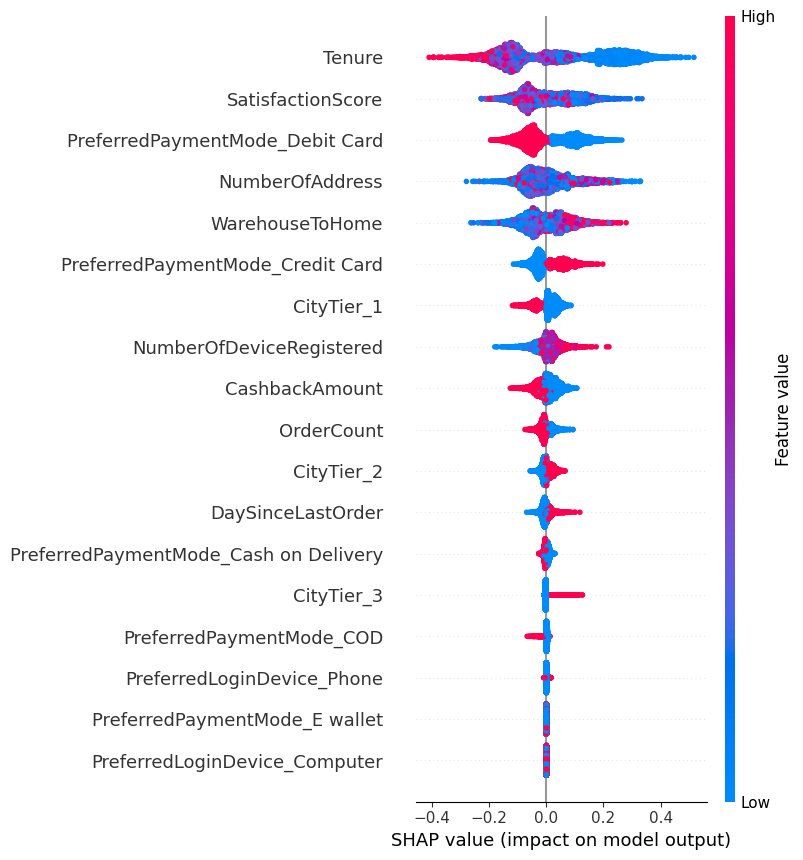

In [51]:
'''
In order to run this code,
please make sure using numpy version 1.24.0 or less.
Otherwise it would be error
'''
# Prepare for SHAP
preprocess = best_model[0:2]
feature_prep = preprocess.transform(X_train_balanced)

# Calculate SHAP values for model interpretability
shap_values = shap.TreeExplainer(best_model.named_steps['model'],
                                 data=feature_prep,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(feature_prep)

# Create a summary plot to visualize feature importances
shap.summary_plot(shap_values, feature_prep, feature_names = cols_after_ct)

The SHAP value can help determine the impact of each variable on the target features. We analyzed several of these impacts:

- The higher the `Tenure` value, the more it decreases the probability of the customer churning.
- The same trend applies to `SatisfactionScore` and the Debit Card payment method; the lower their values, the more likely the customer is to stay.
- Customers in city tier 3 are more likely to churn.
- others features most of them kind of balance that might be need other features to determine if customer churn or not churn

---
### Model Weakness - FN & FP

**1. False Negative**

In [52]:
# Concate test set with y_test_pred to analyze the false negative
X_test_capped['y_test'] = y_test
X_test_capped['y_test_pred'] = y_test_pred

# Query only the False Negative
false_negatif = (X_test_capped['y_test'] == 1) & (X_test_capped['y_test_pred'] == 0)
fn_df = X_test_capped[false_negatif]

In [53]:
# Analyze the categorical columns
display(fn_df.describe(include='object'))

# Analyze numerical columns
fn_df.drop(columns='CityTier').describe().loc[['mean', '50%', '25%', '75%'], :]

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,13,13,13,13,13
unique,2,3,2,3,3
top,Computer,Debit Card,Male,Mobile,Married
freq,7,8,8,8,7


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,y_test,y_test_pred
mean,4.846154,10.769231,2.692308,4.076923,3.538462,4.461538,0.153846,14.538462,1.461538,2.615385,1.769231,155.307692,1.0,0.0
50%,1.000000,10.000000,3.000000,4.000000,3.000000,4.000000,0.000000,15.000000,1.000000,2.000000,2.000000,151.000000,1.0,0.0
25%,1.000000,7.000000,2.000000,4.000000,3.000000,2.000000,0.000000,12.000000,1.000000,1.000000,1.000000,125.000000,1.0,0.0
75%,9.000000,14.000000,3.000000,5.000000,4.000000,6.000000,0.000000,16.000000,2.000000,2.000000,3.000000,167.000000,1.0,0.0


The model has weakness to identify churn customer when it has
- Computer as its preffered login device
- Debit Card as its preffered payment method and married as their marital status
- Tenure mean 4.8
- hours spend on app about 2-3 hours

**2. False Positive**

In [54]:
# Query only the False Positive
false_positive = (X_test_capped['y_test'] == 0) & (X_test_capped['y_test_pred'] == 1)
fp_df = X_test_capped[false_positive]

In [55]:
# Analyze the categorical
display(fp_df.describe(include='object'))

# Analyze numerical columns
fp_df.drop(columns='CityTier').describe().loc[['mean', '50%', '25%', '75%'], :]

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,26,26,26,26,26
unique,2,5,2,4,3
top,Phone,Debit Card,Male,Mobile,Single
freq,22,12,20,21,14


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,y_test,y_test_pred
mean,2.576923,12.692308,2.730769,3.307692,2.807692,3.230769,0.307692,15.346154,1.076923,2.0,2.0,147.461538,0.0,1.0
50%,0.000000,12.000000,3.000000,3.000000,3.000000,2.000000,0.000000,13.500000,1.000000,1.0,2.0,132.000000,0.0,1.0
25%,0.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,13.000000,0.000000,1.0,0.0,125.000000,0.0,1.0
75%,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,1.000000,18.500000,1.000000,2.0,3.0,154.750000,0.0,1.0


The model has weakness to identify not-churn customer when it has
- Phone as its preffered login device
- Debit Card as its preffered payment method and Singles as their marital status
- Tenure mean 2.5
- hours spend on app about 2-3 hours

## 9. Model Saving

This part we will save the model and other necessary part that we need to use the model in inference document, such as:
- the model
- the data inference that we already splitted before

In [56]:
# Export the model
with open('model.pkl', 'wb') as file_1 :
    pickle.dump(best_model, file_1)

In [57]:
# Export the data inference
data_inf.to_csv('data_inf.csv', index=False)

## 10. Summary

### Conceptual Problems
1. **Background and Operation of Bagging** [(*source*)](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)
   - **Background**: Bagging (Bootstrap Aggregating) is an ensemble learning technique designed to improve the performance and robustness of machine learning models, especially decision trees. It was introduced to address the problem of high variance and overfitting in individual models.
   - **Operation**: Bagging works by creating multiple subsets (samples) of the training data through random sampling with replacement. Then, it trains separate base models (e.g., decision trees) on each of these subsets. During prediction, it combines the predictions of these models through techniques like majority voting (for classification) or averaging (for regression). By combining multiple models trained on different data subsets, bagging reduces overfitting and increases the model's generalization performance.

2. **Difference Between Random Forest and Boosting Algorithms** [(*source*)](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)
   - **Random Forest**: Random Forest is an ensemble method that combines multiple decision trees to make predictions. It uses a technique called "bagging" where multiple decision trees are trained independently on bootstrapped subsets of the data. Additionally, it introduces randomness in the feature selection process, which further reduces correlation between trees. During prediction, it combines the outputs of these trees to make a final prediction.
   - **Boosting**: Boosting is another ensemble method that focuses on improving model accuracy by sequentially training multiple weak learners (e.g., shallow decision trees) and giving more weight to data points that are difficult to classify correctly. It adjusts the weights of misclassified data points in each iteration, which leads to subsequent models focusing on the previously misclassified examples. Boosting continues until a predefined number of iterations is reached or no further improvement is observed. The final prediction is made by combining the weighted predictions of these models.

3. **Cross Validation** [(*source*)](https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/)
   - **Cross Validation (CV)**: Cross Validation is a technique used to assess the performance and generalization ability of a machine learning model. It involves splitting the dataset into multiple subsets or "folds." The model is trained on a subset of the data (training set) and tested on the remaining data (validation or test set). This process is repeated multiple times, with different subsets used as the validation/test set in each iteration. The primary goal is to estimate how well the model will perform on unseen data (i.e., its generalization performance). Common CV techniques include k-fold cross-validation, leave-one-out cross-validation, and stratified cross-validation.
   - **Purpose**: Cross Validation helps detect issues like overfitting and underfitting. It provides a more robust estimate of a model's performance by using multiple validation sets. It's widely used for hyperparameter tuning, model selection, and assessing the model's reliability.

### Conclusion
- The classification model was successfully built, and model benchmarking was performed using cross-validation among five models. The KNN model achieved the best recall score among the others.
- While the KNN model's score is impressive, it exhibited overfitting when evaluated with the test set. Even with hyperparameter tuning and feature selection, the model did not improve significantly, leading us to switch to the XGBoost model, the second-best performer.
- After tuning and feature selection, a well-fitting model was identified with a recall score of 93.15%.
- However, the model still has some weaknesses in identifying certain data characteristics:
  - The model struggles to identify churn customers (False Negatives) when they:
    - Use a computer as their preferred login device
    - Prefer Debit Card as their payment method and are married in marital status
    - Have a tenure mean of 4.8
    - Spend about 2-3 hours on the app
  - The model also struggles to identify non-churn (False Positive) customers when they:
    - Use a phone as their preferred login device
    - Prefer Debit Card as their payment method and are singles in marital status
    - Have a tenure mean of 2.5
    - Spend about 2-3 hours on the app.

### Business Recommendation

1. **Implement Predictive Churn Alerts:**

   - Set up real-time predictive churn alerts to notify your team when a customer is at risk of churning. This allows you to take immediate action to retain valuable customers. Since the model that created before are able to predict the churn possibility

   - Financial case: 
     - Consider the average revenue per customer is Rp 500,000.
     - By retaining just 10 high-value customers per month, you save Rp 5 million in potential lost revenue.

2. **Segment Customers for Targeted Interventions:**

   - Segment company customer base into high-risk and low-risk churn groups based on your model's predictions. Implement targeted interventions for each group, such as personalized offers and proactive customer support.
   
   - Financial case: 
     - Cost of Intervention: Assume you allocate IDR 500,000 for personalized offers and support for each high-risk customer.
     - High-Risk Customers: Identify 1,000 high-risk customers.
     - Total Intervention Cost: IDR 500,000 * 1,000 = IDR 500 million.
     - Retained Revenue: If retaining these customers generates an additional IDR 2 million per customer, you gain IDR 2 million * 1,000 = IDR 2 billion.
     - Net Financial Impact: IDR 2 billion - IDR 500 million = IDR 1.5 billion.


3. **Customer Feedback Loop and Improvement:**

   - Establish a feedback loop with company customer service and marketing teams to gather insights from churned customers. Use this feedback to make improvements in company products, services, or customer experience.

   - Financial case: 
     - Assume that based on feedback, you make changes that reduce churn by 10%.
     - If you have an monthly revenue of IDR 10 million, this results in an additional IDR 1 million in revenue.

4. **Model Refinement for Precision:**

   - Refine the churn prediction model to improve precision. This means reducing false positives, ensuring that the customers company target for retention efforts are genuinely at risk of churning. There always a room for an improvement, with more data and explore more model.

These recommendations, when implemented, can have a positive financial impact on your business by reducing churn, retaining valuable customers, and optimizing your retention strategies. However, the exact financial impact will depend on the specifics of your business, such as the average customer value and the cost of retention efforts.